In [ ]:
!pip install "matplotlib>=3.7.1"
!pip install "pandas>=1.5.3"
!pip install "numpy>=1.25.2"

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
f = open('/content/drive/MyDrive/FastQC/result.json')
data = json.load(f)

**1. Basic Statistic**

In [ ]:
print("Total Sequence:",data['basic']['total_seq'])
print("Total Number of Bases:",data['basic']['total_bases'])
print("Sequence Length:",data['basic']['min_len'],'-',data['basic']['max_len'])

Total Sequence: 1000000
Total Number of Bases: 74479287
Sequence Length: 35 - 75


**2. Sequence Length Distribution**

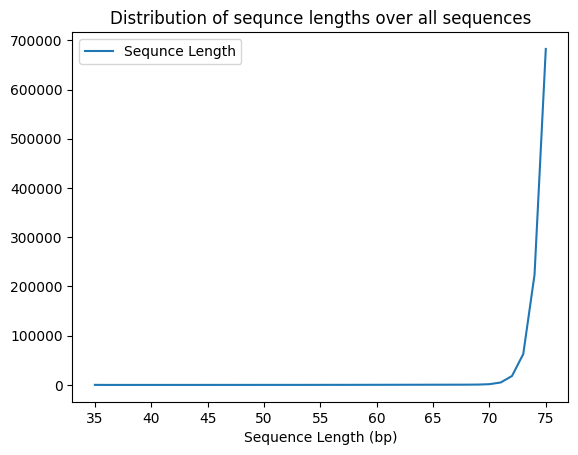

In [ ]:
df_len_dist=pd.DataFrame.from_dict(data['basic']['len_dist']).rename(columns={"count": "Sequnce Length"}).set_index("length").sort_index()
df_len_dist.plot()
plt.title("Distribution of sequnce lengths over all sequences")
plt.xlabel("Sequence Length (bp)")
plt.show()

In [ ]:
if any(df_len_dist.index==0):
  print('\033[91m'+"Failure: at least one of the sequences have zero length")
elif len(np.unique(df_len_dist))!=1:
  print('\033[93m'+"Warning: all sequences are not the same length")
else:
  print('\033[92m'+"Passed")

**3. Per Sequence Quality Scores**

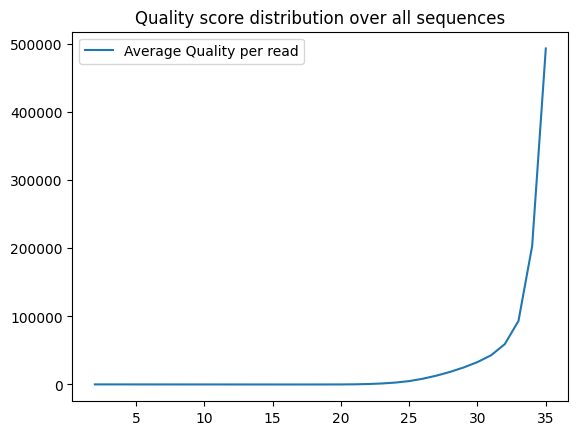

In [ ]:
df_score_over_seq=pd.DataFrame.from_dict(data['qual']['PerSeq']).rename(columns={"count": "Average Quality per read"}).set_index("quality").sort_index()
df_score_over_seq.plot()
plt.title("Quality score distribution over all sequences")
plt.xlabel("")
plt.show()

In [ ]:
if any(df_score_over_seq.idxmax()<20):
  print('\033[91m'+"Failure: the most frequently observed mean quality is below 20")
elif any(df_score_over_seq.idxmax()<27):
  print('\033[93m'+"Warning: the most frequently observed mean quality is below 27")
else:
  print('\033[92m'+"Passed")

Passed


**4. Per base sequence quality**

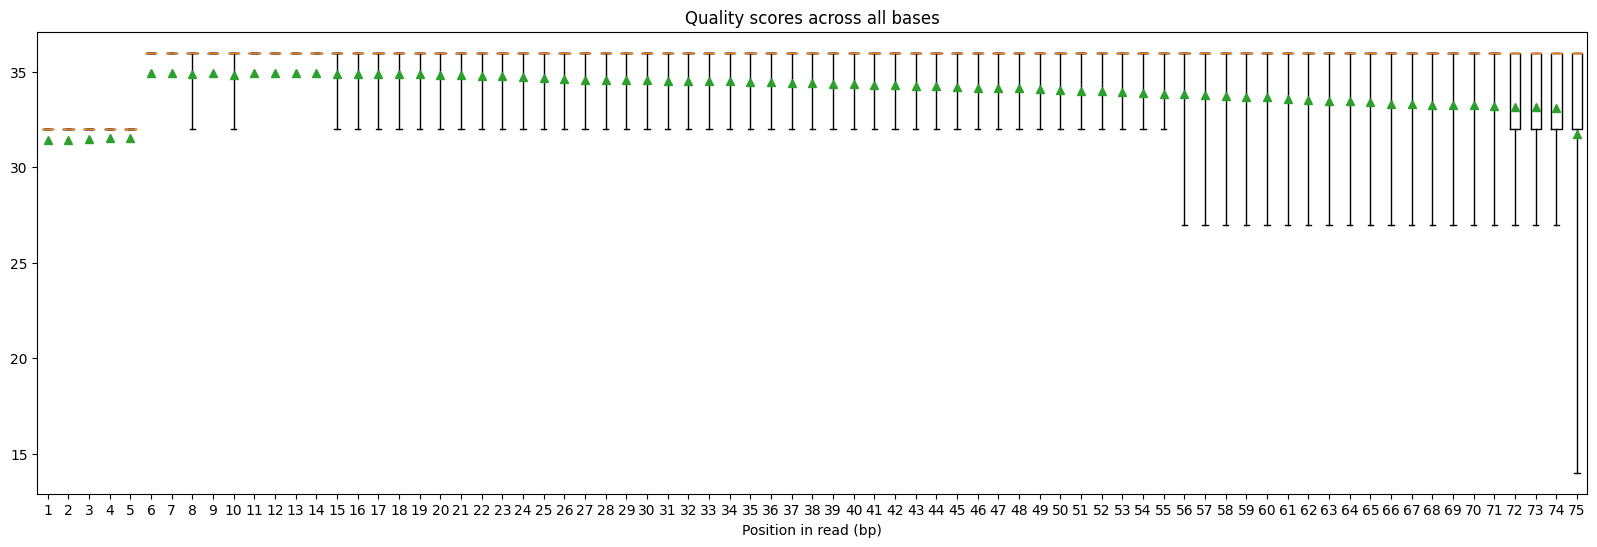

In [ ]:
fig, axes2 = plt.subplots(figsize=(20,6))
axes2.bxp(sorted(data['qual']['PerBase'], key=lambda d: d['label']) ,showfliers=False, showmeans=True)
plt.title("Quality scores across all bases")
plt.xlabel("Position in read (bp)")
plt.show()

In [ ]:
if (any(x['q1']<5 for x in data['qual']['PerBase']) or any(x['med']<20 for x in data['qual']['PerBase'])):
  print('\033[91m'+"Failure: the lower quartile for any base is less than 5 or if the median for any base is less than 20")
elif (any(x['q1']<10 for x in data['qual']['PerBase']) or any(x['med']<25 for x in data['qual']['PerBase'])):
  print('\033[93m'+"Warning: the lower quartile for any base is less than 10, or if the median for any base is less than 25")
else:
  print('\033[92m'+"Passed")

Passed


**5. Per Base Sequence Content**

In [ ]:
df_content=pd.DataFrame.from_dict(data['seq']['content']).set_index("read").sort_index()

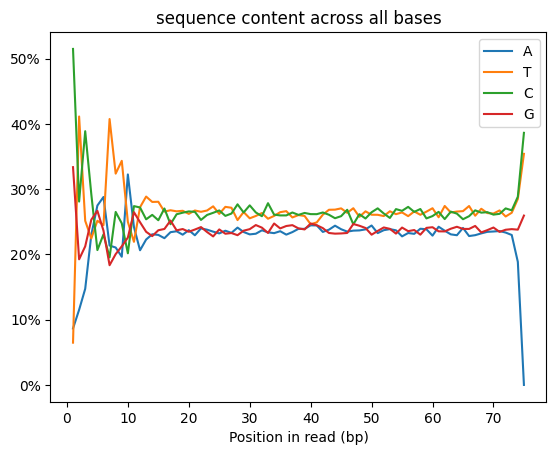

In [ ]:
df_content_ATCG=df_content[['A','T','C','G']]
ax = df_content_ATCG.plot()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("sequence content across all bases")
plt.xlabel("Position in read (bp)")
plt.show()

In [ ]:
diff=df_content_ATCG.max(axis=1)-df_content_ATCG.min(axis=1)
if (diff > 0.2).any():
  print('\033[91m'+"Failure: difference between A and T, or G and C is greater than 20% in at least one position")
elif (diff > 0.1).any():
  print('\033[93m'+"Warning: difference between A and T, or G and C is greater than 20% in at least one position")
else:
  print('\033[92m'+"Passed")

Failure: difference between A and T, or G and C is greater than 20% in at least one position


**6. Per Base N Content**

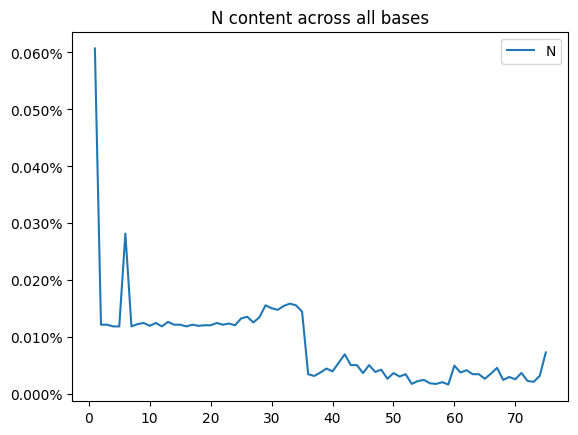

In [ ]:
df_content_N=df_content[['N']]
ax = df_content_N.plot()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("N content across all bases")
plt.xlabel("")
plt.show()

In [ ]:
if (df_content_N.max() > 0.2).any():
  print('\033[91m'+"Failure: at least one position shows an N content of >20%")
elif (df_content_N.max() > 0.05).any():
  print( '\033[93m'+"Warning: at least one position shows an N content of >5%")
else:
  print('\033[92m'+"Passed")

Passed


**7. Overrepresented sequences**

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame.from_dict(data['seq']['count'])[['sequence','count','percentage of total']].style.format({'percentage of total': '{:,.2%}'.format,}).hide()

sequence,count,percentage of total
GCCCTCTTGAACTCTCTCTTCAAAGTTCTTTTCAACTTTCCCTTACGGTA,2743,0.27%
CTCTCTTCAAAGTTCTTTTCAACTTTCCCTTACGGTACTTGTTGACTATC,2396,0.24%
CTTCCGTACGCCACATGTCCCGCGCCCCGCCGCGGGGCGGGGATTCGGCG,2264,0.23%
CTTCAAAGTTCTTTTCAACTTTCCCTTACGGTACTTGTTGACTATCGGTC,2068,0.21%
CTTAGATGGAGTTTACCACCCGCTTTGGGCTGCATTCCCAAGCAACCCGA,1943,0.19%
CTCTTAACGGTTTCACGCCCTCTTGAACTCTCTCTTCAAAGTTCTTTTCA,1941,0.19%
CCTTAGGCAACCTGGTGGTCCCCCGCTCCCGGGAGGTCACCATATTGATG,1925,0.19%
CTGGAGTCTTGGAAGCTTGACTACCCTACGTTCTCCTACAAATGGACCTT,1910,0.19%
CTCCGTTTCCGACCTGGGCCGGTTCACCCCTCCTTAGGCAACCTGGTGGT,1785,0.18%
GTCTGCGAGAGCGCCAGCTATCCTGAGGGAAACTTCGGAGGGAACCAGCT,1771,0.18%


In [ ]:
if data['seq']['count'][0]['percentage of total']>0.01:
    print('\033[91m'+"Failure: at least one sequence is found to represent more than 1% of the total")
elif data['seq']['count'][0]['percentage of total']>0.001:
  print( '\033[93m'+"Warning: at least one sequence is found to represent more than 0.1% of the total")
else:
  print('\033[92m'+"Passed")